In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the Data Set
Data = pd.read_csv("/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv", encoding="unicode_escape")
Data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [4]:
# Getting information about the Diwali Sales Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# Finding null values in our Diwali Sales Data
Data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
# Removing Unwanted Data
Data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
Data.dropna(inplace=True)

In [8]:
#Converting Data type of Amount Column
Data['Amount']=Data['Amount'].astype('int')

In [9]:
# Converting Amount into Lakhs
Data['Amount']=Data['Amount']/100000

In [10]:
Data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [12]:
# Descriptive Statistic of our Data
Data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,0.094536
std,12.753866,1.114967,0.052224
min,12.000000,1.000000,0.001880
25%,27.000000,2.000000,0.054430
50%,33.000000,2.000000,0.081090
75%,43.000000,3.000000,0.126750
max,92.000000,4.000000,0.239520


# **EXPLORATORY DATA ANALYSIS**

**AGE**

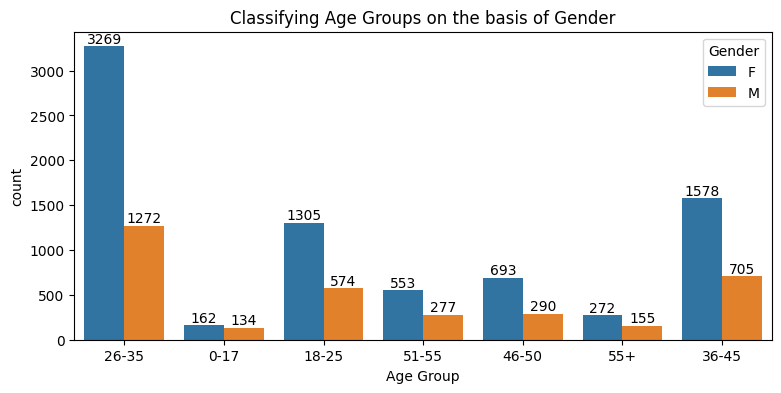

In [13]:
plt.figure(figsize=(9,4))
analysis_age = sns.countplot(x='Age Group',hue='Gender',data=Data)
analysis_age.set(title="Classifying Age Groups on the basis of Gender")
for bars in analysis_age.containers:
    analysis_age.bar_label(bars)

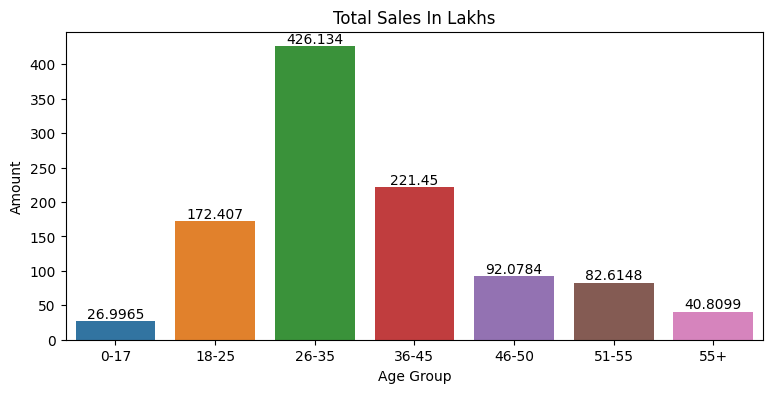

In [14]:
plt.figure(figsize=(9,4))
Total_sales_age = Data.groupby('Age Group')['Amount'].sum().reset_index()
ax=sns.barplot(x='Age Group',y='Amount',data=Total_sales_age,width=0.8)
ax.set(title='Total Sales In Lakhs')
for bars in ax.containers:
    ax.bar_label(bars)

**STATE**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

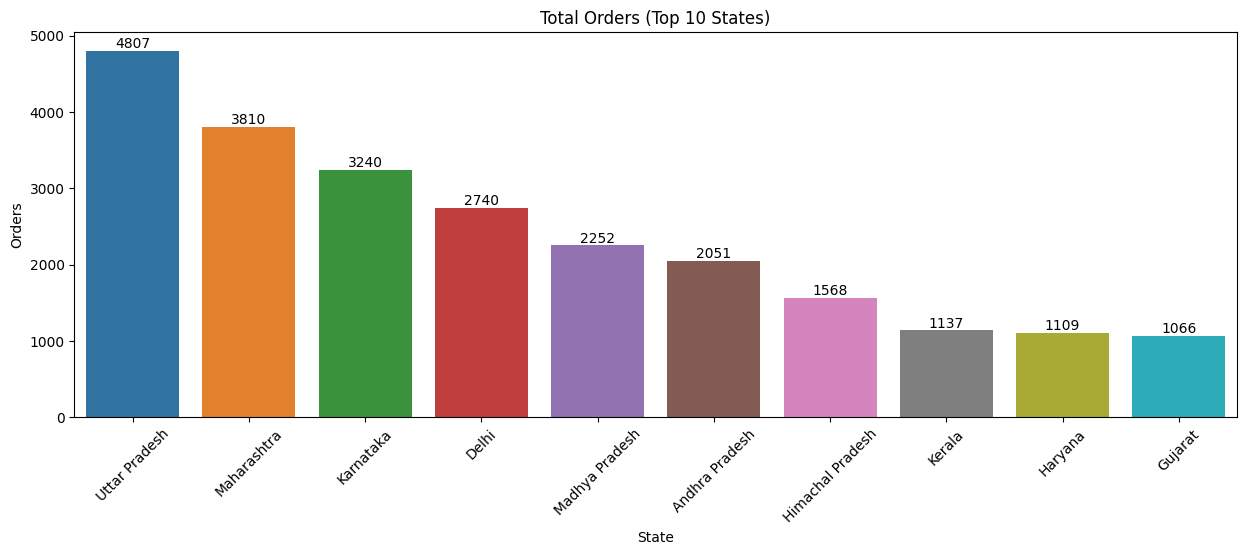

In [15]:
Total_orders_state=Data.groupby('State')['Orders'].sum().reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(x='State',y='Orders', data = Total_orders_state.nlargest(10, 'Orders'))
ax.set(title="Total Orders (Top 10 States)")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

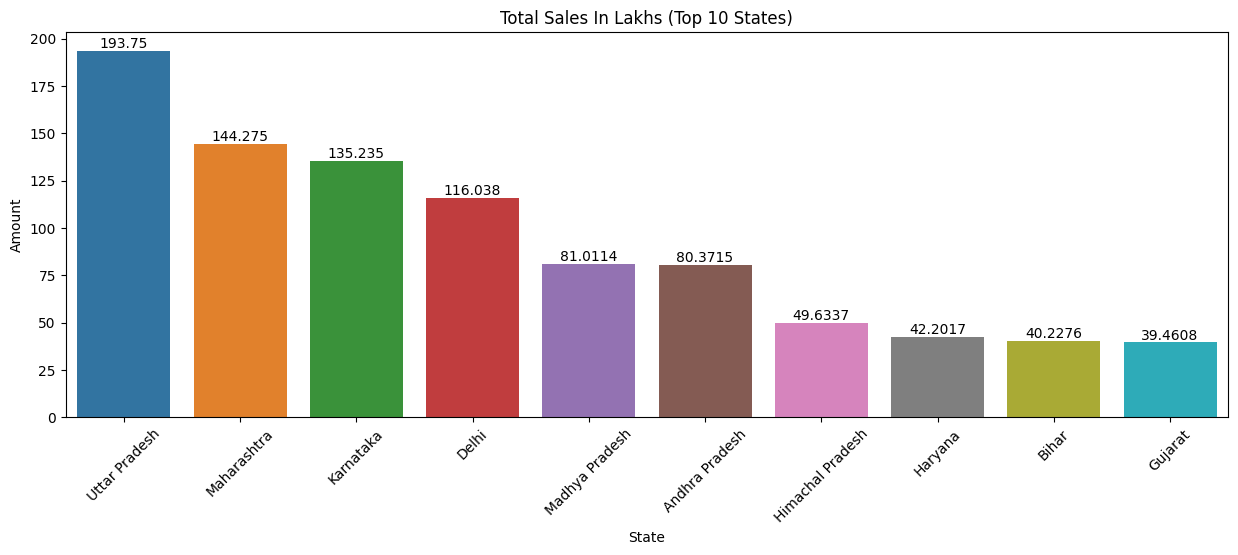

In [16]:
Total_amount_state=Data.groupby('State')['Amount'].sum().reset_index()
plt.figure(figsize=(15,5))
bx=sns.barplot(x='State',y='Amount', data = Total_amount_state.nlargest(10, 'Amount'))
bx.set(title="Total Sales In Lakhs (Top 10 States)")
for bars in bx.containers:
    bx.bar_label(bars)
plt.xticks(rotation=45)

**MARITAL STATUS**

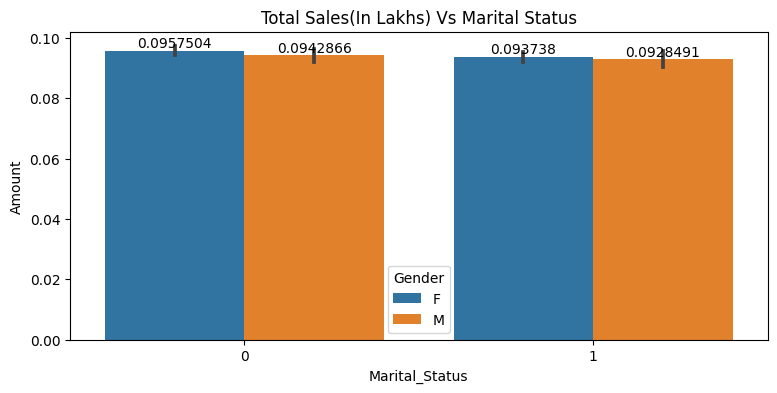

In [17]:
plt.figure(figsize=(9,4))
count_ms=sns.barplot(data=Data, x ='Marital_Status', y='Amount', hue = 'Gender')
count_ms.set(title="Total Sales(In Lakhs) Vs Marital Status")
for bars in count_ms.containers:
    count_ms.bar_label(bars)

**PRODUCT CATEGORY**

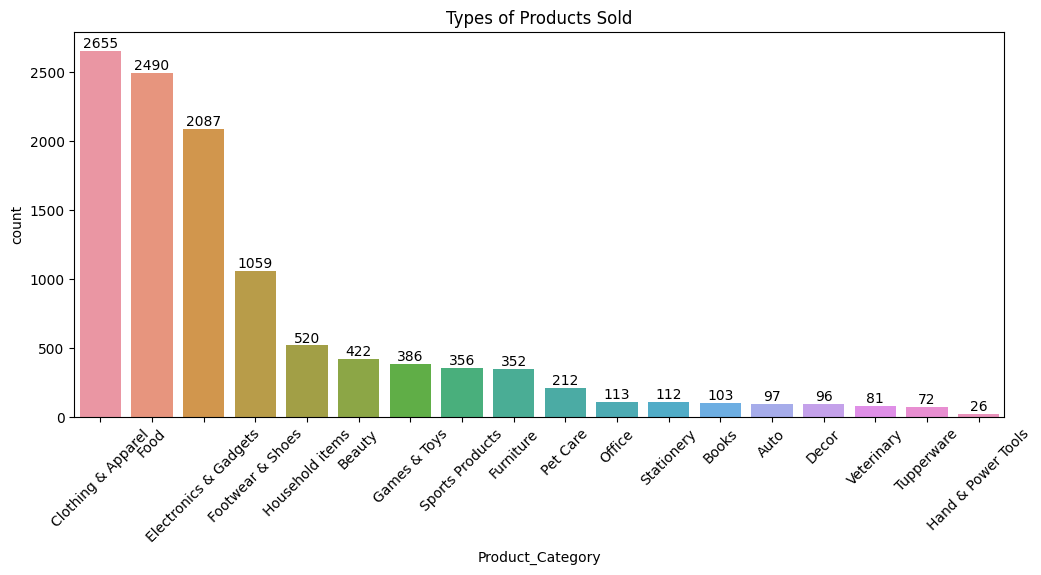

In [18]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data= Data, x='Product_Category',order=Data['Product_Category'].value_counts().index)
ax.set(title="Types of Products Sold")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery')])

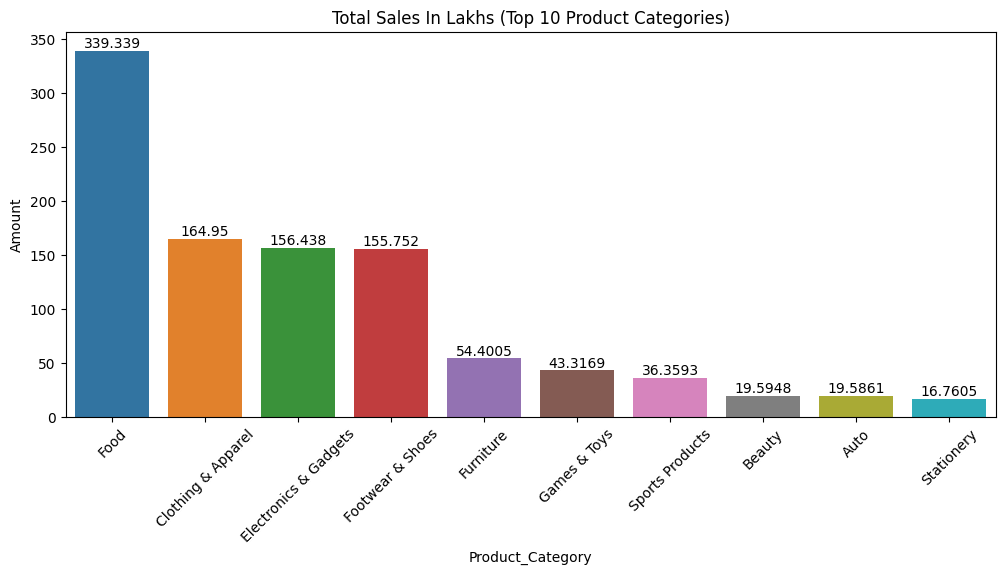

In [19]:
plt.figure(figsize=(12,5))
Total_sales_Product = Data.groupby('Product_Category')['Amount'].sum().reset_index()
cx=sns.barplot(x='Product_Category',y='Amount',data = Total_sales_Product.nlargest(10, 'Amount'))
cx.set(title="Total Sales In Lakhs (Top 10 Product Categories)")
for bars in cx.containers:
    cx.bar_label(bars)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Clothing & Apparel'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Household items'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Games & Toys'),
  Text(7, 0, 'Furniture'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Pet Care')])

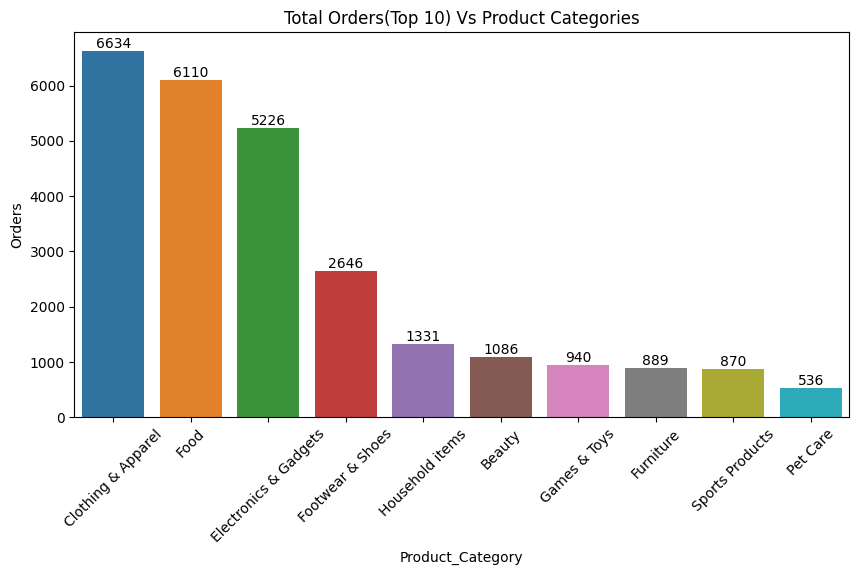

In [20]:
plt.figure(figsize=(10,5))
Total_sales_Orders = Data.groupby('Product_Category')['Orders'].sum().reset_index()
cx=sns.barplot(x='Product_Category',y='Orders',data = Total_sales_Orders.nlargest(10, 'Orders'))
cx.set(title="Total Orders(Top 10) Vs Product Categories")
for bars in cx.containers:
    cx.bar_label(bars)
plt.xticks(rotation=45)